# Explorative Datenanalyse mit noun_chunks

## Importe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud
from collections import Counter

%matplotlib inline

## Read Data

In [3]:
df = pd.read_pickle('../data/reden-bundesregierung.p')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   person      2983 non-null   object        
 1   titel       2982 non-null   object        
 2   datum       2983 non-null   datetime64[ns]
 3   untertitel  2088 non-null   object        
 4   url         2983 non-null   object        
 5   anrede      1447 non-null   object        
 6   rohtext     2983 non-null   object        
 7   ort         690 non-null    object        
 8   doc_object  2983 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 209.9+ KB


In [5]:
df.head(3).T

,0,1,2
person,Gerhard Schröder,Julian Nida-Rümelin,Gerhard Schröder
titel,Rede des Bundeskanzlers zur Eröffnung der 52. ...,Redebeitrag von Staatsminister Nida-Rümelin in...,Interview mit Bundeskanzler Schröder in 'Berli...
datum,2002-02-06 00:00:00,2002-02-01 00:00:00,2002-04-14 00:00:00
untertitel,"Man kann diese Filmfestspiele nicht eröffnen, ...","""Ich bin der Auffassung, wir müssen nicht nur ...",In dem Interview äußert sich Bundeskanzler Sch...
url,http://archiv.bundesregierung.de/bpaexport/red...,http://archiv.bundesregierung.de/bpaexport/red...,http://archiv.bundesregierung.de/bpaexport/red...
anrede,"Sehr geehrte Frau Nair, liebe Mitglieder der J...",Meine sehr geehrten Damen und Herren!,NaN
rohtext,"es ist angekündigt worden, man sollte im Beruf...","Frau Präsidentin! An Sie gerichtet, Herr Börn...",Frage (Peter Hahne): Bevor wir uns über den Au...
ort,None,None,None
doc_object,"(es, ist, angekündigt, worden, ,, man, sollte,...","(Frau, Präsidentin, !, , An, Sie, gerichtet, ...","(Frage, (, Peter, Hahne, ):, Bevor, wir, uns, ..."


## Create noun_chunks

In [16]:
def create_noun_chunks(doc):
    '''
    
    '''
    
    chunk_liste = []
    
    for sent in doc.sents:    
        for token in sent:
            if token.pos_ == 'NOUN':
                chunk = ''
                for w in token.lefts:
                    if w.pos_ == 'ADJ':
                        chunk = w.lemma_.lower() + ' ' # oder hier einen Unterstrich nutzen, um nachher besser Wordclouds zu erstellen
                        chunk = chunk + token.lemma_.lower() # oder hier und ein Zeile oben das token.lemma_ nehmen >>> Testen
                    if len(chunk) >1: 
                        chunk_liste.append(chunk)
    
    return chunk_liste
    
 #   return [ chunk for chunk in doc.noun_chunks ]
    

In [17]:
%%time

df.loc[:, 'noun_chunks'] = df.loc[:, 'doc_object'].apply(lambda doc: create_noun_chunks(doc))

Wall time: 2.76 s


In [18]:
df.loc[1, 'noun_chunks']

['aristotelischen theorie',
 'kathartische wirkung',
 'anspruchsvolle film',
 'groß partei',
 'groß übereinstimmung',
 'folgend position',
 'klein publikum',
 'anspruchsvoll film',
 'schwierig film',
 'interessant angebot',
 'dritt programm',
 'deutsch kinofilm',
 'zweite pol',
 'extreme pol',
 'zuständig minister',
 'filmpolitischen arbeitsgemeinschaft',
 'marginal änderungsbedarf',
 'heutig filmförderstrukturen',
 'verschieden initiative',
 'bestimmen weichenstellungen',
 'vorgelegt filmkonzept',
 'ander worten',
 'interessant stoff',
 'deutsch film',
 'groß bedeutung',
 'zentral element',
 'jetzig situation',
 'oberhausener manifest',
 'deutsch film',
 'deutsch kinokassen',
 'deutsch film',
 'oberhausener manifest',
 'gering qualität',
 'künstlerische qualität',
 'gering wahrnehmung',
 'deutsch film',
 'damalige innenminister',
 'junger film',
 'deutsch film',
 'deutsch film',
 'ausländisch festival',
 'heutig struktur',
 'deutsch film',
 'groß gewicht',
 'ander wirtschaftsbranche',

In [19]:
df.loc[:, 'noun_chunks_as_string'] = [','.join(map(str, token)).lower() for token in df.loc[:, 'noun_chunks']]

In [10]:
with open('../data/stopwords.txt', 'r', encoding='utf8') as f:
    stopwords = f.read().splitlines()

In [11]:
new_stop_words = ['herren', 'herr', 'damen', 'dame', 'herrn']
stopwords = [*stopwords, *new_stop_words]

In [ ]:
# bei Durchlauf dieser Zelle stirbt der Kernel
# >>> check

wc = WordCloud(width=1500, height=1000,
        random_state=42,
        background_color='white',
        colormap='magma',
        stopwords=stopwords,
        collocations=False,  # Bigrams werden nicht dargestellt
        max_words=100)        # Anzahl der Worte, die dargestellt werden sollen


wc.generate(df.loc[:, 'noun_chunks_as_string'].str.cat(sep=' ')) 

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.title('Wordcloud aller Reden')
plt.axis('off')
plt.show()

## Barchart zu den Noun Chunks

* Vergleichbar mit bigrams und trigrams

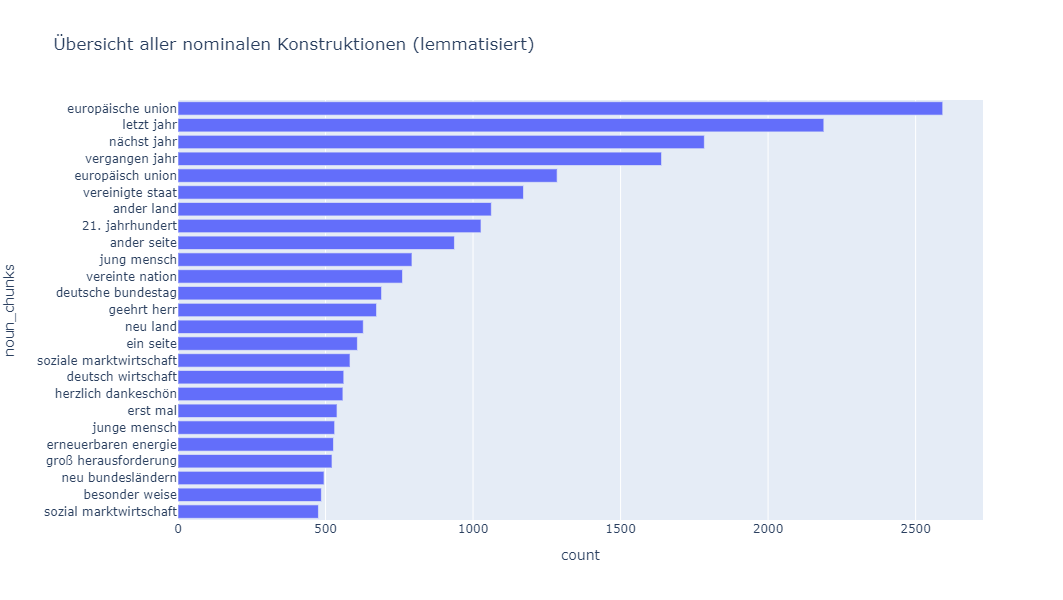

In [31]:
column_ser = df.loc[:, 'noun_chunks']
column_list = [ i for x in column_ser for i in x ]
counter = Counter(column_list)

df_column = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df_column = df_column.rename(columns={'index': 'noun_chunks', 0: 'count'})
df_column = df_column.sort_values(ascending=False, by='count')

fig = px.bar(df_column.head(25).sort_values(ascending=True, by='count'),
             x='count',
             y='noun_chunks',
             width=800,
             height=600,
             title='Übersicht aller nominalen Konstruktionen (lemmatisiert)')
fig.show()

## Auswertung der TOP 5 - Redner:innen

In [25]:
person_counts = pd.crosstab(index=df.loc[:, 'person'], columns='count')

In [27]:
top10_person = person_counts.sort_values(by='count', ascending=False).head(10).index

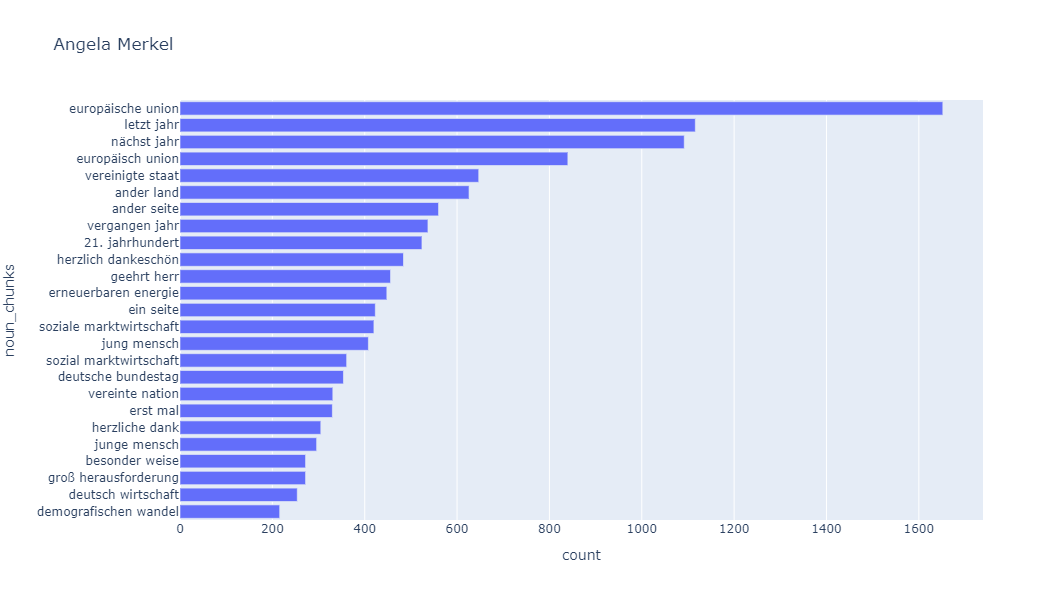

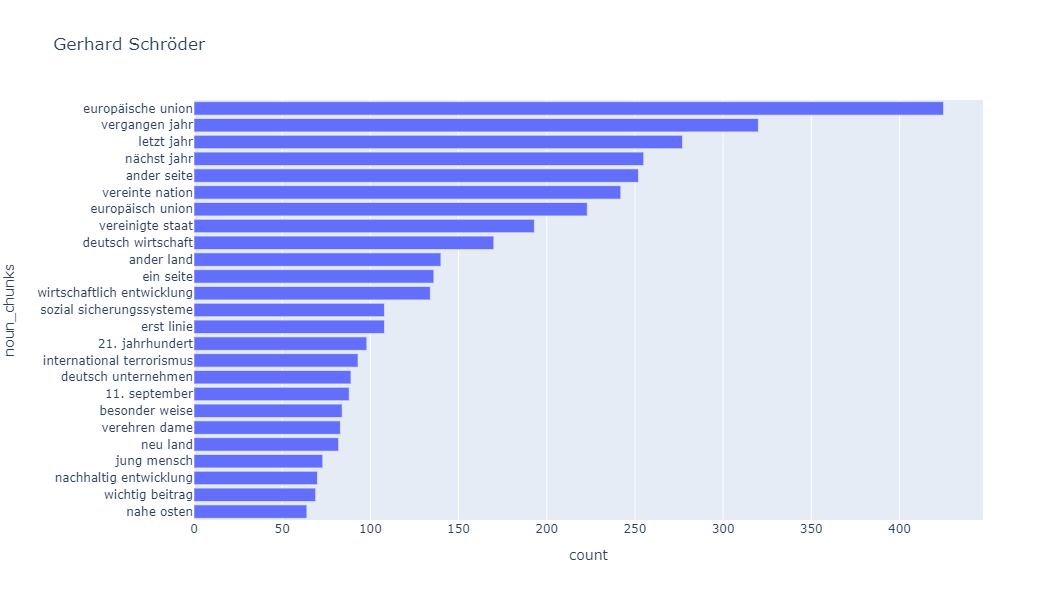

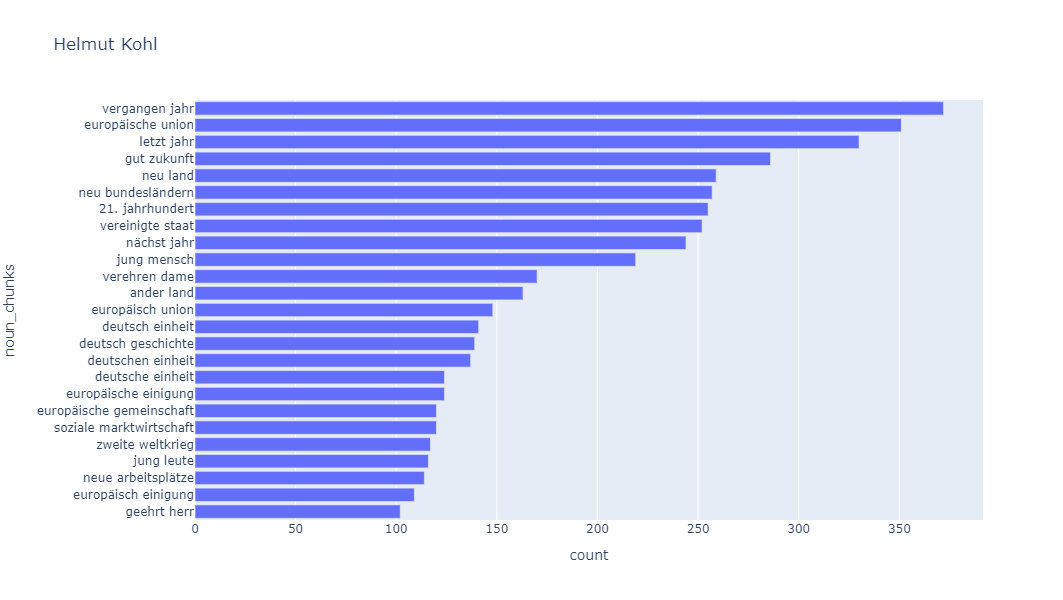

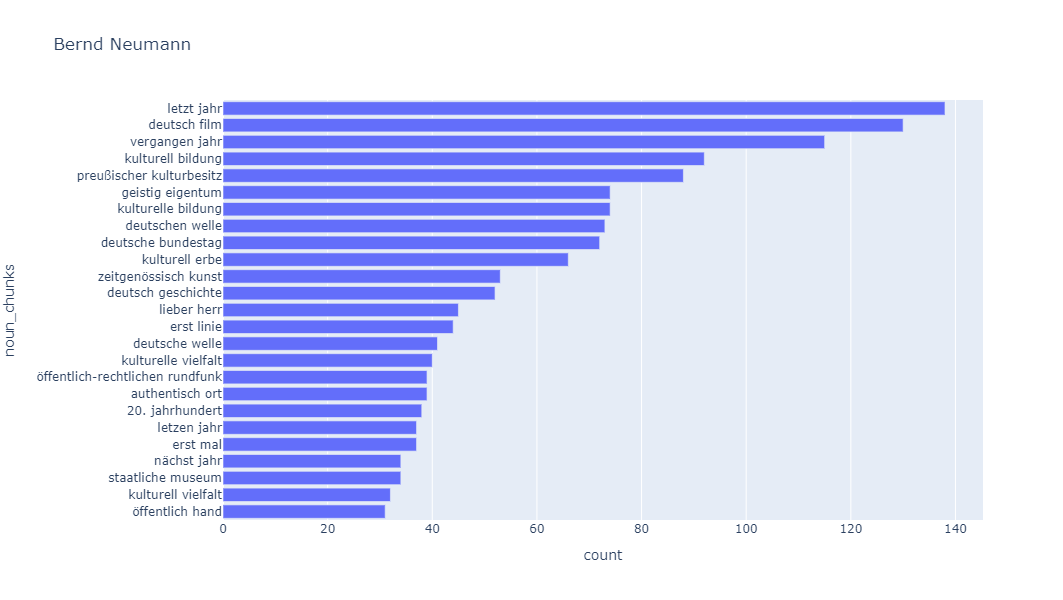

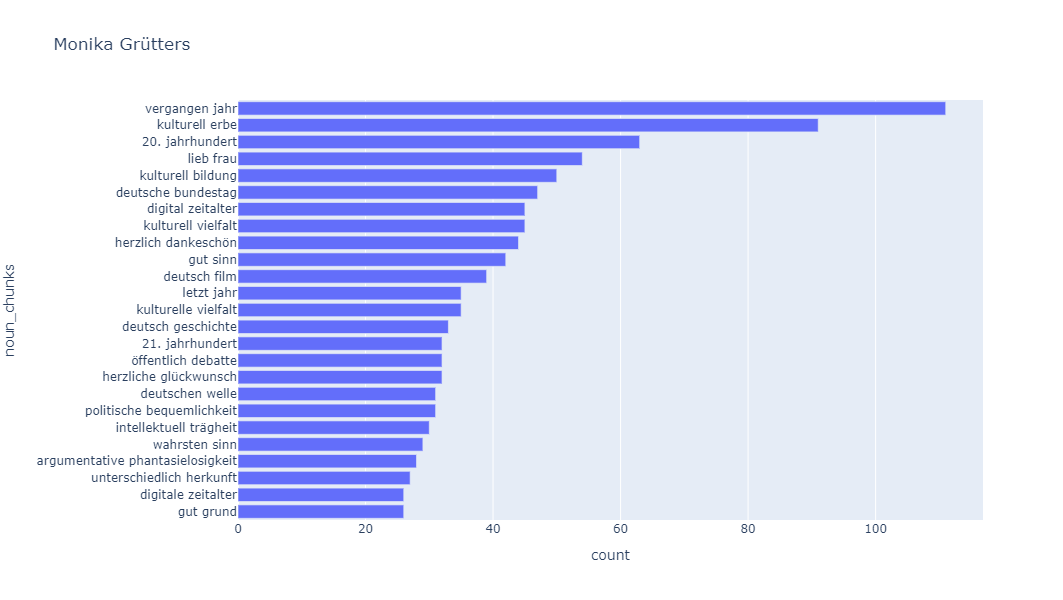

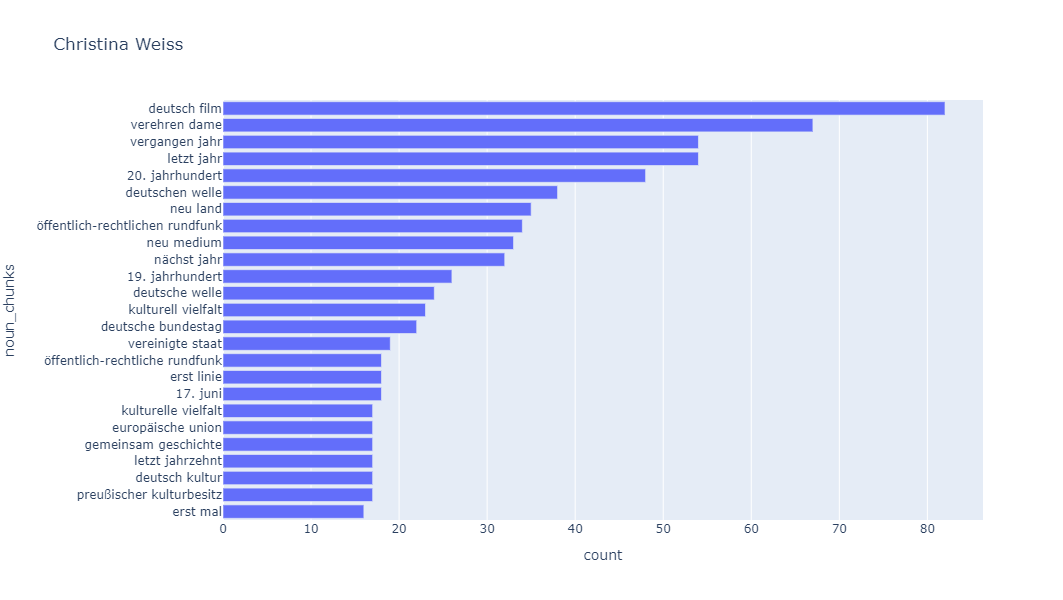

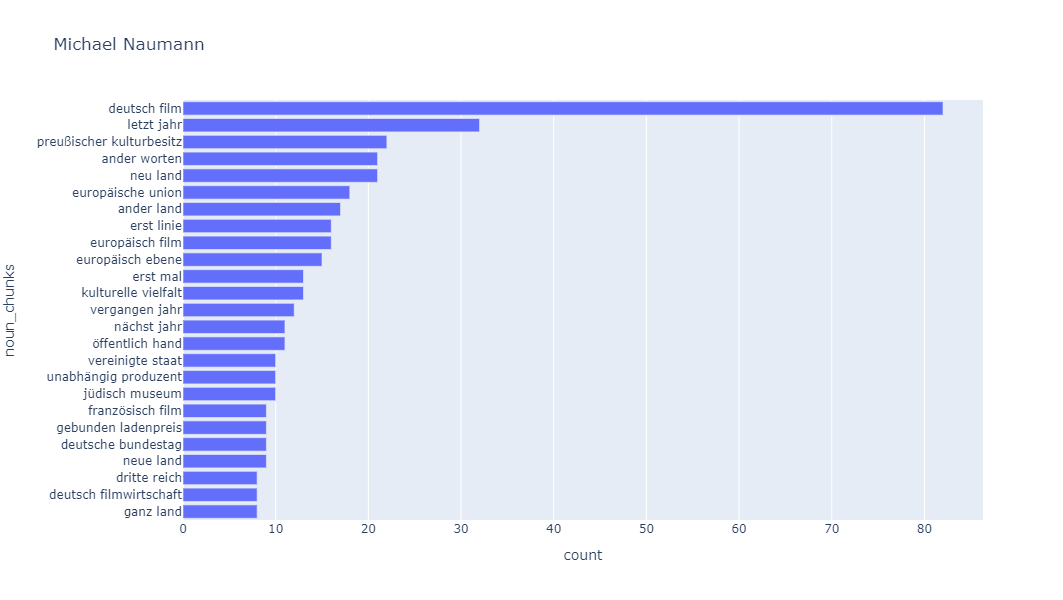

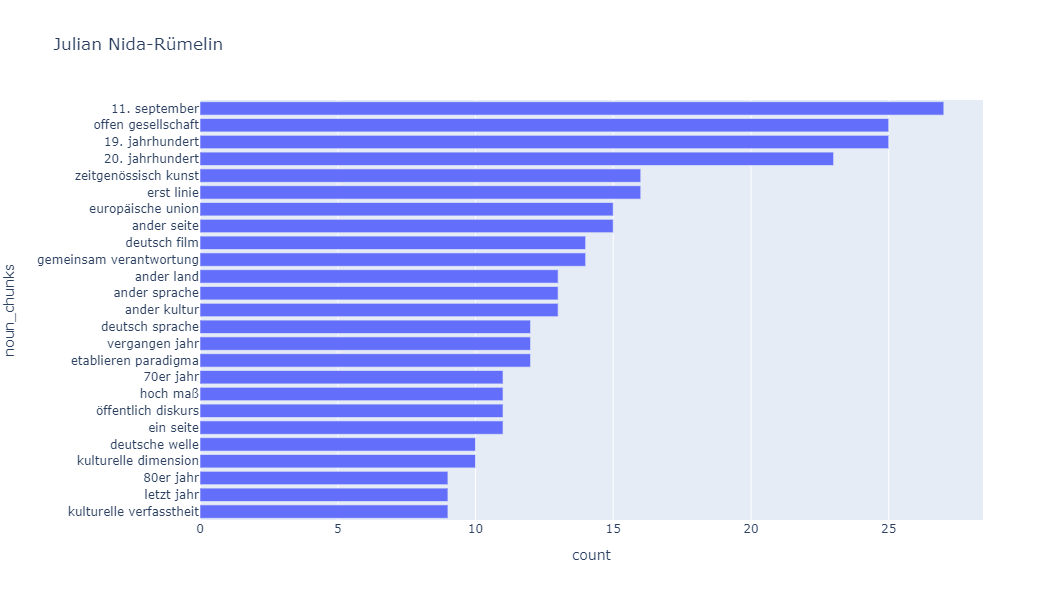

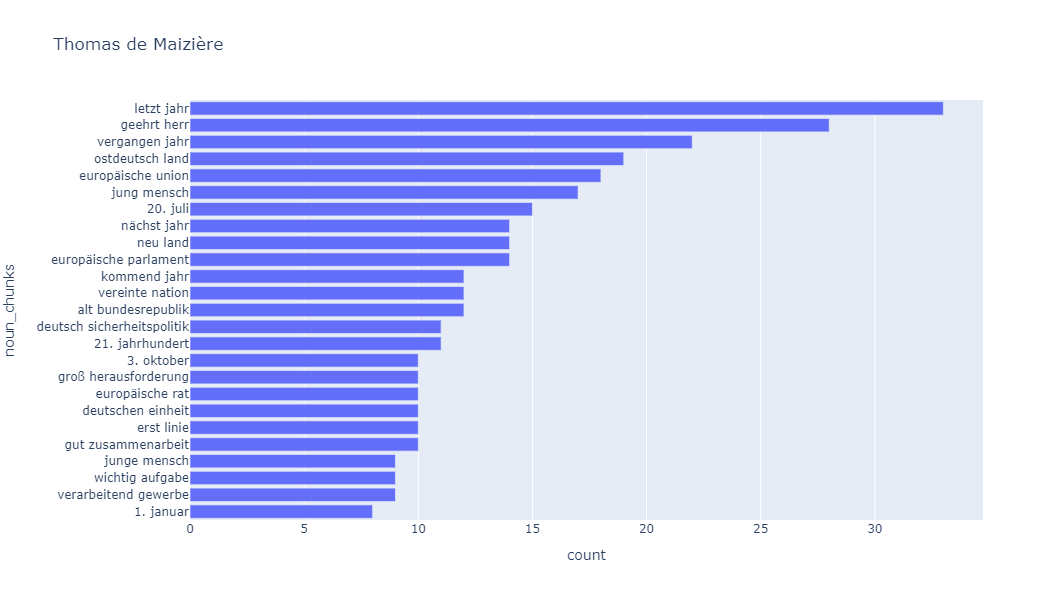

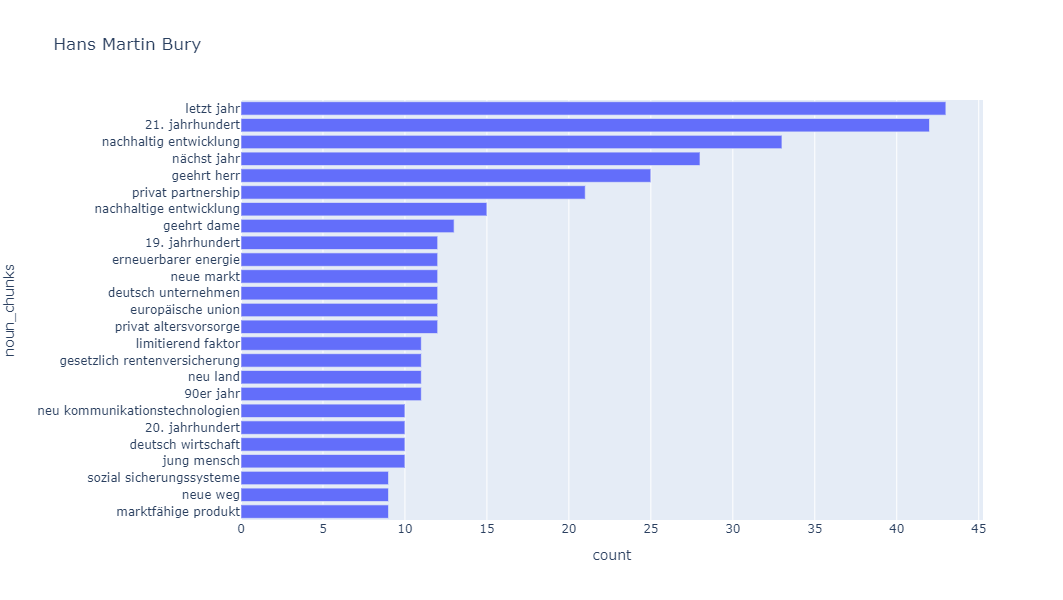

In [30]:
for person in top10_person:

    df_temp = df[df.loc[:, 'person'] == person]
    column_ser = df_temp.loc[:, 'noun_chunks']
    column_list = [ i for x in column_ser for i in x ]
    counter = Counter(column_list)

    df_column = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    df_column = df_column.rename(columns={'index': 'noun_chunks', 0: 'count'})
    df_column = df_column.sort_values(ascending=False, by='count')

    fig = px.bar(df_column.head(25).sort_values(ascending=True, by='count'),
                 x='count',
                 y='noun_chunks',
                 width=800,
                 height=600, 
                 title=person)
    fig.show()